In [71]:
# setup jupyter enviornment and load data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import os
from pandas import Series, DataFrame

In [72]:
# the code location

print(os.path.abspath('.'))

/Users/jliu0061/PycharmProjects/tracking_analysis/locomotion analysis


In [73]:
# choose the datafold for analysis

source_path =  './D1/'

In [74]:
csvFile = os.listdir(source_path)
print(csvFile)

['D1-1-7.csv', 'D1-1-5.csv', 'D1-1-4.csv', 'D1-3-2.csv', 'D1-1-1.csv', 'D1-3-1.csv', 'D1-1-3.csv', 'D1-1-2.csv', 'D1-2-6.csv', 'D1-4-3.csv', 'D1-2-5.csv', 'D1-2-1.csv', 'D1-2-2.csv', 'D1-2-3.csv', 'D1-2-9.csv', 'D1-1-8.csv']


In [75]:
print(len(csvFile))

16


In [76]:
component_percentage = pd.DataFrame()
component_per_accumulate = pd.DataFrame()

for single_file in csvFile:
    #path = './L1/{}'.format(single_file)
    '''Be careful, do not repeat this step, otherwise it will generate error. 
    If the error is generated, you should check the print(len(cvsFile)). If the number
    is higher than the CSV file number, it means there are some analysis result in the folder. 
    If it happens, you should go to the fold, completely delete the folder, then regenerate the folder and copy data to the folder'''
    try:
        df = pd.read_csv(os.path.join(source_path,single_file), sep=',', skiprows=4)
        df = df.fillna(df.mean())
        df1 = df.T
        df1 = df1.drop(['Frame', 'Time'], axis = 0)
        pca = PCA(n_components = 10)
        df2 = pca.fit_transform(df1)
        result = pd.DataFrame(df2)
        result.to_excel('./L1/{}_component.xlsx'.format(single_file))
        component_percentage_single = pd.DataFrame(pca.explained_variance_ratio_, columns = ['{}'.format(single_file)])
        component_percentage['{}'.format(single_file)] = component_percentage_single['{}'.format(single_file)]
        component_percentage_single['Component_accu'] = component_percentage_single.cumsum()
        component_per_accumulate['{}'.format(single_file)] = component_percentage_single['Component_accu']
    except ValueError:
        print("Please check the fold, make sure that data analysis had not been conducted before")
        print("If the dataset had been analyzed, you can repeat analysis after the analsyis data is deleted or removed.")
        break
    
    
component_percentage.to_excel('./L1/component.xlsx')
component_per_accumulate.to_excel('./L1/component_accumulation.xlsx')
    #component_percentage = pd.DataFrame(pca.explained_variance_ratio_, columns = ['Component_percent'])
    #component_percentage['Component_accu'] = component_percentage['Component_percent'].cumsum()
    #component_percentage.to_excel('./L1/{}component.xlsx'.format(single_file))

In [77]:
component_percentage['average'] = component_percentage.mean(axis = 1)
component_per_accumulate['average'] = component_per_accumulate.mean(axis = 1)
component_percentage


,D1-1-7.csv,D1-1-5.csv,D1-1-4.csv,D1-3-2.csv,D1-1-1.csv,D1-3-1.csv,D1-1-3.csv,D1-1-2.csv,D1-2-6.csv,D1-4-3.csv,D1-2-5.csv,D1-2-1.csv,D1-2-2.csv,D1-2-3.csv,D1-2-9.csv,D1-1-8.csv,average
0,0.426137,0.411411,0.398159,0.437486,0.459241,0.405618,0.428365,0.405691,0.383819,0.397359,0.427485,0.389896,0.393336,0.394309,0.391061,0.403258,0.409539
1,0.339586,0.351752,0.326507,0.361691,0.364978,0.339967,0.359219,0.322395,0.370114,0.348509,0.370393,0.334513,0.364089,0.358787,0.358602,0.338075,0.350574
2,0.120810,0.108264,0.129817,0.089797,0.089265,0.108855,0.099799,0.146851,0.108749,0.124764,0.082030,0.145050,0.124743,0.112256,0.134053,0.132437,0.116096
3,0.061826,0.074041,0.081992,0.055270,0.037883,0.072183,0.064801,0.070841,0.076931,0.069022,0.064024,0.065264,0.062465,0.077001,0.068940,0.066068,0.066784
4,0.018230,0.019559,0.025002,0.021644,0.017243,0.029633,0.016466,0.020939,0.024392,0.025564,0.020436,0.024822,0.020853,0.023427,0.019072,0.024754,0.022002
5,0.012840,0.014018,0.016335,0.014577,0.013735,0.021731,0.013169,0.013890,0.015782,0.015958,0.017275,0.019308,0.014273,0.015326,0.014228,0.014694,0.015446
6,0.009699,0.008772,0.009919,0.009418,0.009036,0.011942,0.008809,0.008133,0.012027,0.009719,0.009165,0.011397,0.009956,0.009952,0.007424,0.009361,0.009671
7,0.007011,0.007252,0.007555,0.006320,0.004747,0.006031,0.005208,0.006830,0.005233,0.005415,0.005269,0.005522,0.005821,0.005252,0.004076,0.006826,0.005898
8,0.003853,0.004926,0.004708,0.003792,0.003866,0.004036,0.004158,0.004424,0.002944,0.003682,0.003919,0.004222,0.004460,0.003685,0.002538,0.004518,0.003983
9,0.000008,0.000005,0.000006,0.000005,0.000005,0.000005,0.000006,0.000006,0.000009,0.000006,0.000004,0.000008,0.000005,0.000004,0.000007,0.000008,0.000006


In [78]:
component_per_accumulate

,D1-1-7.csv,D1-1-5.csv,D1-1-4.csv,D1-3-2.csv,D1-1-1.csv,D1-3-1.csv,D1-1-3.csv,D1-1-2.csv,D1-2-6.csv,D1-4-3.csv,D1-2-5.csv,D1-2-1.csv,D1-2-2.csv,D1-2-3.csv,D1-2-9.csv,D1-1-8.csv,average
0,0.426137,0.411411,0.398159,0.437486,0.459241,0.405618,0.428365,0.405691,0.383819,0.397359,0.427485,0.389896,0.393336,0.394309,0.391061,0.403258,0.409539
1,0.765723,0.763163,0.724666,0.799176,0.824220,0.745584,0.787584,0.728086,0.753933,0.745869,0.797878,0.724409,0.757425,0.753096,0.749663,0.741333,0.760113
2,0.886533,0.871427,0.854483,0.888974,0.913485,0.854440,0.887383,0.874938,0.862683,0.870633,0.879908,0.869458,0.882168,0.865352,0.883716,0.873770,0.876209
3,0.948359,0.945468,0.936475,0.944244,0.951368,0.926622,0.952185,0.945778,0.939613,0.939655,0.943933,0.934722,0.944632,0.942353,0.952656,0.939838,0.942994
4,0.966590,0.965027,0.961477,0.965888,0.968610,0.956255,0.968650,0.966717,0.964006,0.965219,0.964368,0.959543,0.965485,0.965781,0.971728,0.964593,0.964996
5,0.979430,0.979045,0.977812,0.980465,0.982345,0.977986,0.981819,0.980606,0.979787,0.981177,0.981643,0.978851,0.979759,0.981106,0.985956,0.979287,0.980442
6,0.989129,0.987817,0.987731,0.989883,0.991382,0.989928,0.990628,0.988739,0.991814,0.990896,0.990808,0.990249,0.989715,0.991058,0.993380,0.988648,0.990113
7,0.996140,0.995069,0.995286,0.996202,0.996129,0.995959,0.995836,0.995569,0.997047,0.996311,0.996078,0.995770,0.995536,0.996310,0.997455,0.995473,0.996011
8,0.999992,0.999995,0.999994,0.999995,0.999995,0.999995,0.999994,0.999994,0.999991,0.999994,0.999996,0.999992,0.999995,0.999996,0.999993,0.999992,0.999994
9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 432x288 with 0 Axes>

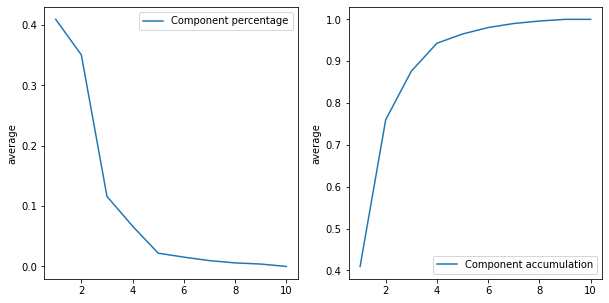

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()
fig, ax = plt.subplots(1,2, figsize = (10, 5))
plt.subplot(121)
ax1 = sns.lineplot(data = component_percentage, x= [x for x in range(1,11)], y = 'average', label = 'Component percentage')
plt.subplot(122)
ax2 = sns.lineplot(data = component_per_accumulate, x= [x for x in range(1,11)], y = 'average', label = 'Component accumulation')